In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import statsmodels.api as sm
from statsmodels.formula.api import ols
# from bioinfokit.analys import stat

In [5]:
##Mac:
#df1 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/BMA.csv')

##PC:
df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/BMA.csv')

##Begin:
df1['percent_loss'] = df1['percent_loss']*100
df1['percent_water'] = df1['percent_water']*100

print(df1)

      Date VegID  PlotID  PairID   Latitude  Longitude  BenthoConc       ChlA  \
0   29-Sep    JR       1     1.0  31.420026 -81.289688        0.44   5.820868   
1   29-Sep    JR       2     2.0  31.420138 -81.289643        0.77   8.731303   
2   29-Sep    JR       3     3.0  31.420070 -81.289601        0.88  10.509901   
3   29-Sep    JR       4     4.0  31.420043 -81.289633        1.49   7.922849   
4   29-Sep    JR       5     5.0  31.419918 -81.289576        1.18  16.654151   
..     ...   ...     ...     ...        ...        ...         ...        ...   
95  21-May    SS       1     NaN  31.390442 -81.285426         NaN  14.001049   
96  21-May    SS       2     NaN  31.390501 -81.285451         NaN  21.001573   
97  21-May    SS       3     NaN  31.390622 -81.285515         NaN   9.100682   
98  21-May    SS       4     NaN  31.390656 -81.285523         NaN  10.734137   
99  21-May    SS       5     NaN  31.390643 -81.285584         NaN  12.134242   

        Phaeo  Elevation   

In [3]:
#mud_df = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Mud.csv')
#mud_df['phaeo:chl'] = mud_df['Phaeo']/mud_df['ChlA']
#print(mud_df)

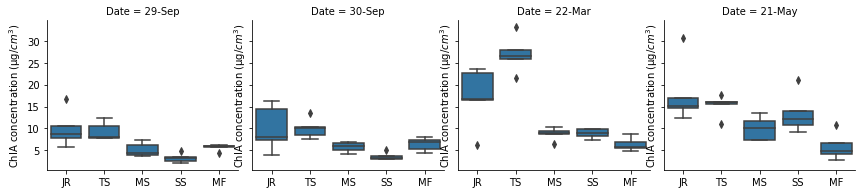

In [6]:
veg_plot = sns.FacetGrid(df1, col="Date", sharex=False)
veg_plot.map(sns.boxplot, 'VegID', 'ChlA', order=["JR", "TS", "MS", "SS", "MF"])

veg_plot.set(xlabel='', ylabel='ChlA concentration (µg/$cm^3$)')

my_path = os.path.abspath('/Users/asariversjulien/Documents/Georgia/Project')
my_file = 'g1.png'
#veg_plot.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight')

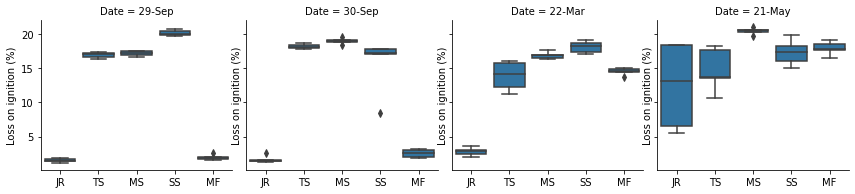

In [7]:
loi_plot = sns.FacetGrid(df1, col="Date", sharex=False)
loi_plot.map(sns.boxplot,'VegID', 'percent_loss', order=["JR", "TS", "MS", "SS", "MF"])

loi_plot.set(xlabel='', ylabel='Loss on ignition (%)')
#loi_plot.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight')

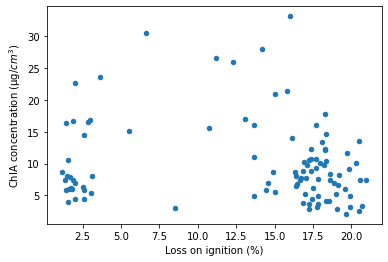

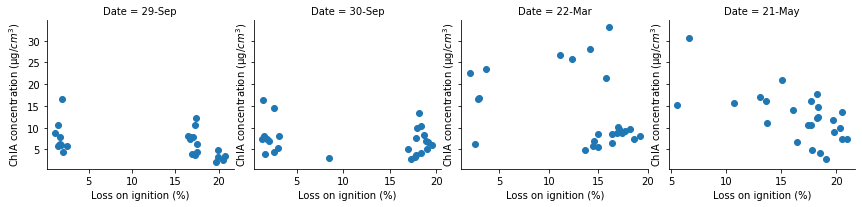

In [8]:
loi_chl = df1.plot(kind = 'scatter', x = 'percent_loss', y = 'ChlA')
#loi_chl

g = sns.FacetGrid(df1, col="Date", sharex=False)
g = g.map(plt.scatter, 'percent_loss', 'ChlA')

loi_chl.set(xlabel='Loss on ignition (%)', ylabel='ChlA concentration (µg/$cm^3$)')
g.set(xlabel='Loss on ignition (%)', ylabel='ChlA concentration (µg/$cm^3$)')

#loi_chl.figure.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight') ##NOTE the extra 'figure' argument
#g.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight')

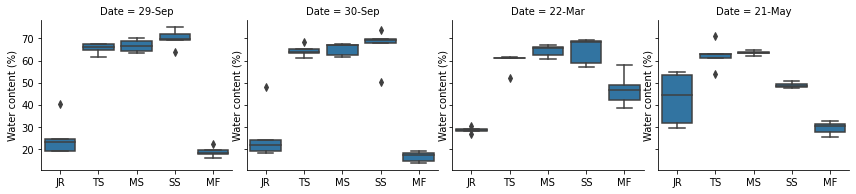

In [9]:
h2o_plot = sns.FacetGrid(df1, col="Date", sharex=False)
h2o_plot.map(sns.boxplot, 'VegID', 'percent_water', order=["JR", "TS", "MS", "SS", "MF"])

h2o_plot.set(xlabel='', ylabel='Water content (%)')
#h2o_plot.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight')

[Text(0.5, 0, 'Water content (%)'),
 Text(0, 0.5, 'ChlA concentration (µg/$cm^3$)')]

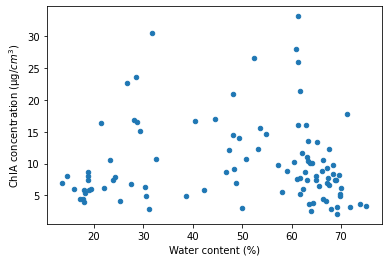

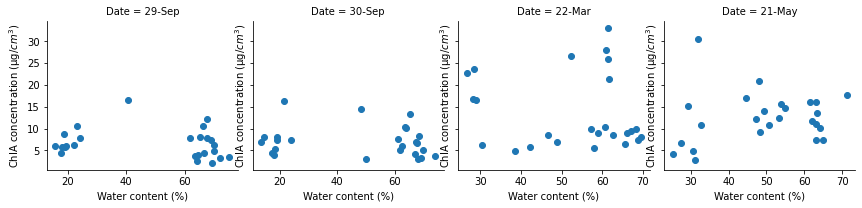

In [10]:
g_g = df1.plot(kind = 'scatter', x = 'percent_water', y = 'ChlA')
g_g
g = sns.FacetGrid(df1, col="Date", sharex=False)
g = g.map(plt.scatter, 'percent_water', 'ChlA')

g.set(xlabel='Water content (%)', ylabel='ChlA concentration (µg/$cm^3$)')
g_g.set(xlabel='Water content (%)', ylabel='ChlA concentration (µg/$cm^3$)')

#g_g.figure.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight') ##NOTE the extra 'figure' argument
#g.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight')

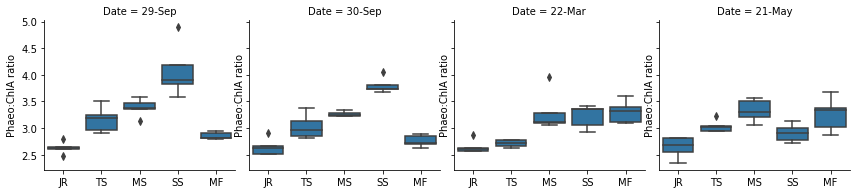

In [11]:
phaeo_plot = sns.FacetGrid(df1, col="Date", sharex=False)
phaeo_plot.map(sns.boxplot, 'VegID', 'Phaeo:Chl', order=["JR", "TS", "MS", "SS", "MF"])

phaeo_plot.set(xlabel='', ylabel='Phaeo:ChlA ratio')
#phaeo_plot.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight')

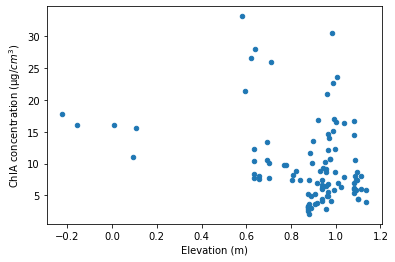

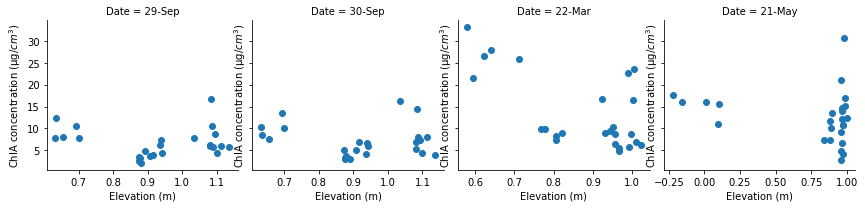

In [12]:
g_g = df1.plot(kind = 'scatter', x = 'Elevation', y = 'ChlA')
g_g
g = sns.FacetGrid(df1, col="Date", sharex=False)
g = g.map(plt.scatter, 'Elevation', 'ChlA')

g_g.set(xlabel='Elevation (m)', ylabel='ChlA concentration (µg/$cm^3$)')
g.set(xlabel='Elevation (m)', ylabel='ChlA concentration (µg/$cm^3$)')

#g_g.figure.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight') ##NOTE the extra 'figure' argument
#g.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight')

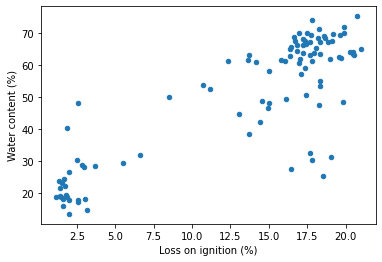

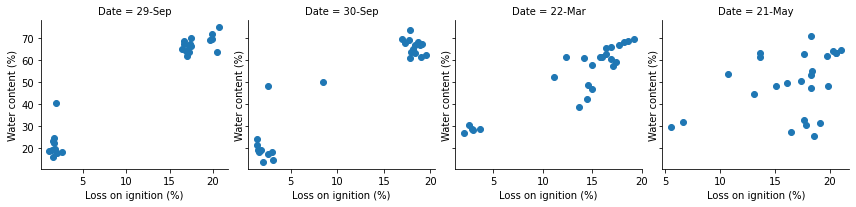

In [13]:
g_g = df1.plot(kind = 'scatter', x = 'percent_loss', y = 'percent_water')
g_g
g = sns.FacetGrid(df1, col="Date", sharex=False)
g = g.map(plt.scatter, 'percent_loss', 'percent_water')

g_g.set(xlabel='Loss on ignition (%)', ylabel='Water content (%)')
g.set(xlabel='Loss on ignition (%)', ylabel='Water content (%)')

#g_g.figure.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight') ##NOTE the extra 'figure' argument
#g.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight')

<AxesSubplot:xlabel='Lab ChlA (µg/$cm^3$)', ylabel='Benthotorch ChlA (µg/$cm^2$)'>

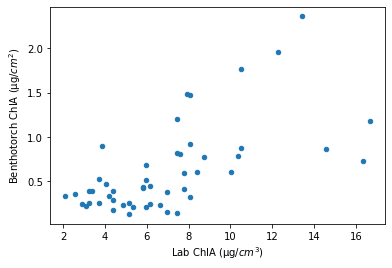

In [14]:
g_g = df1.plot(kind = 'scatter', x = 'ChlA', y = 'BenthoConc')
g_g.set(xlabel='Lab ChlA (µg/$cm^3$)', ylabel='Benthotorch ChlA (µg/$cm^2$)')
g_g

#g_g.figure.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight') ##NOTE the extra 'figure' argument

In [15]:
aov_chl = ols('ChlA ~ C(VegID) * C(Date) + percent_loss + percent_water + Elevation', data=df1).fit() ##C=Categorical
##do you need to transform percentages? Arcsine sqrt? Also all these variables being 'significant' ain't right
print(sm.stats.anova_lm(aov_chl, typ=2))
print(aov_chl.summary())

                       sum_sq    df          F        PR(>F)
C(VegID)           844.212826   4.0  21.979437  3.963041e-12
C(Date)           1258.703269   3.0  43.694495  1.348882e-16
C(VegID):C(Date)   588.969773  12.0   5.111359  3.308440e-06
percent_loss       144.041356   1.0  15.000710  2.240377e-04
percent_water       69.872808   1.0   7.276672  8.579111e-03
Elevation           72.077325   1.0   7.506254  7.637546e-03
Residual           739.377294  77.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                   ChlA   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     15.91
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           2.41e-20
Time:                        11:35:11   Log-Likelihood:                -241.93
No. Observations:                 100 